In [26]:
# Data: cifar-10-python.tar.gz
# http://www.cs.toronto.edu/~kriz/cifar.html
#note that the files are binary

import pickle
import os
import png
import numpy as np
import mxnet as mx

%matplotlib inline

import matplotlib.pyplot as plt

from PIL import Image


def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def preprocessing_cifar10(filenames):
       
       batch1 = unpickle(filenames)
       
       images = batch1[b'data']
       
        #imgaes data will be in unit8 format 0:255 
       images = np.reshape(images, (10000, 3, 32, 32))
       
       output = images.transpose(0,2,3,1).astype("uint8")
    
       labels = batch1[b'labels']
        
       batch_labels = batch1[b'filenames']
        #imagearray will be in numerical format
       imagearray = mx.nd.array(images)
        
       labelarray = mx.nd.array(labels)
    
       return output,images,imagearray, labelarray   


In [33]:
#read the batch files
filenames= ['data_batch_1']

output, images, imagearray, labelarray = preprocessing_cifar10(filenames[0])

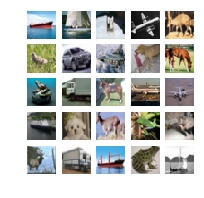

In [4]:
#visualize one of CIFAR 10

#visualize one sample
i=1
data=output[i:i+1][0]

img = Image.fromarray(data, mode='RGB')

img.save('my.png')
img.show()


#visualize 5 samples
fig, axes1 = plt.subplots(5,5,figsize=(3,3))

for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(output)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(output[i:i+1][0])

In [40]:
#collect categories names
categories = unpickle("batches.meta")
label_names=categories[b'label_names']

categories[b'label_names']

categories.values()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])


dict_values([10000, [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], 3072])

In [59]:
label_names = np.array(categories[b'label_names'])
label_names


array([b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog',
       b'frog', b'horse', b'ship', b'truck'], dtype='|S10')

In [106]:
def L1_distance (X1,X2):
    d=np.sum(np.abs(X1.asnumpy()-X2.asnumpy()))
    return d


In [212]:
#KNN based on argmin (L1 dsitance)

#pick one image
j=1

X1=imagearray[j,0]

#look for min L1_distance for that particular image
L1_d_min=np.inf

l = list(range(10000))
l.remove(j)

for i in l :
    X2=imagearray[i,0]
    L1_d1=L1_distance(X1,X2)
    if (L1_d1<L1_d_min):
        L1_d_min=L1_d1
        nn_image=imagearray[i,0]
        min_index=i
    
k=int((labelarray[min_index]).asnumpy()[0])
label_names[k]


b'dog'